# 1. Objective

In this project, we will be predicting the price of used cars. We will be building various Machine Learning Models with different algorithms.In the end, we will compare machine learning models performance.

# 2. Data Used

Here we have used the data from competition on machinehack.com.

# 3. Data Inspection

In this sections, we will explore the data. First lets see the what columns we have in the data and their data types along with missing values information.

In [2]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Loading Libraries

import pandas as pd

import numpy as np

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

import datetime

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

from keras.models import Sequential

from keras.layers import Dense

from prettytable import PrettyTable

In [3]:
# import dataset
df = pd.read_csv('train.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  float64
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  int64  
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

- We can observe that data have 19237 rows and 18 columns.
- There are 5 numeric columns and 13 categorical columns.
- We can observe that no missing values.
- 'Price' column is going to be the target column or dependent feature for this projects.

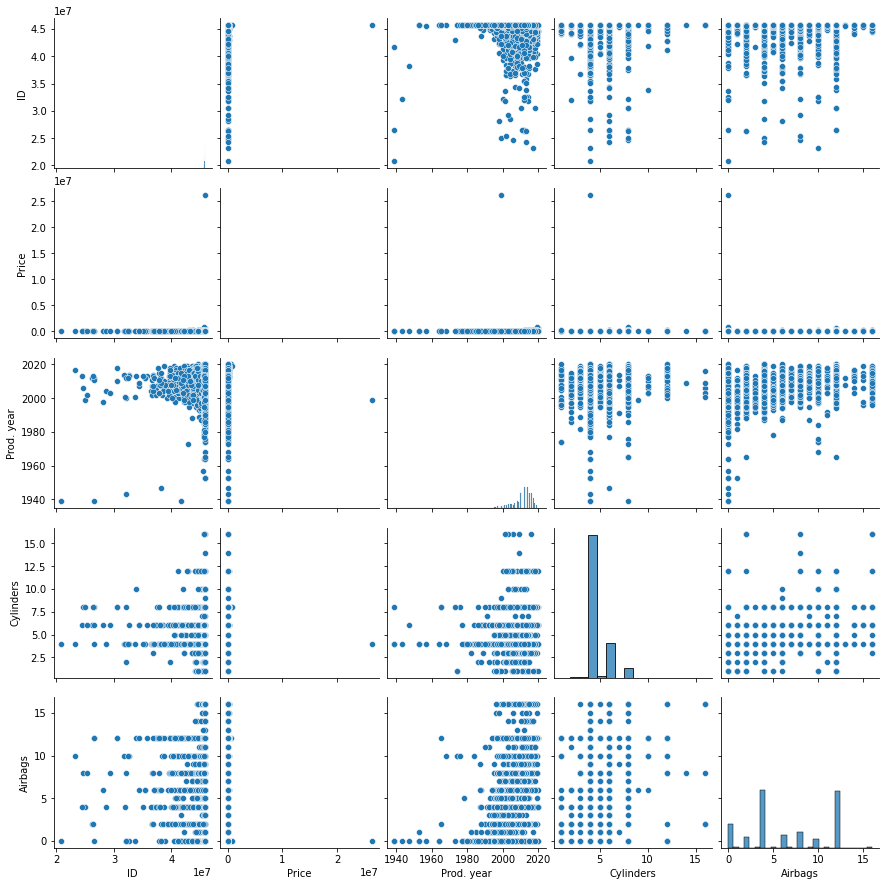

In [5]:
# lets see the distribution of the data.
# set the background style of the plot
sns.pairplot(df)

# 4. Dara Preparation

Here we will clean the data and prepare it for training the model.

## 'ID' column

we are dopping the 'ID' column since it does not hold any significance for car price prediction.

In [6]:
df.drop('ID',axis=1,inplace=True)

## 'Levy' column

- After analyzing the 'Levy' column we found out that it does contain the missing values but it was give as '-' in the data and thats why we were not able to capture the missing values earlier in the data.
- Here we will impute '-' in the 'Levy' column with '0' assuming there was no 'Levy'.We can also impute it with 'mean' or 'median'.

In [7]:
# replace '-' with Nan
df['Levy'] = df['Levy'].replace('-',np.nan)

In [8]:
# covert object into float
df['Levy'] = df['Levy'].astype(float)

In [9]:
# replace Nan with '0'
mean = 0
df['Levy'].fillna(mean,inplace=True)

In [10]:
# change into 2 decimal places
df['Levy'] =round(df['Levy'],2)

## ‘Mileage’ column

'Mileage' column here means how many kilometers the car has driven.'KM' is written the column after each reading.We will remove that.

In [11]:
# remove 'km' and make it numerical.
df['Mileage']=df['Mileage'].apply(lambda x:x.split(' ')[0])
df['Mileage']=df['Mileage'].astype('int')

In [14]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467.0,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,0


## ‘Engine Volume’ column

In the 'Engine Volume ' column along with the Engine Volume ' type' of the engine (Turbo or not Turbo ) is also written.We will create a new column that shows the 'Types' of Engine.

In [13]:
df['Turbo']=df['Engine volume'].apply(lambda x:1 if 'Turbo' in str(x) else 0)
df['Engine volume']=df['Engine volume'].apply(lambda x:str(x).replace('Turbo',''))
df['Engine volume']=df['Engine volume'].astype(float)

## ‘Doors’ Column 

In [15]:
# lets check unique of 'Door'
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [16]:
df['Doors']=df['Doors'].map({'04-May':'4_5','02-Mar':'2_3','>5':'5'})

In [17]:
df['Doors']=df['Doors'].astype(str)

## Handling ‘Outliers’

Lets examine nunerial features.


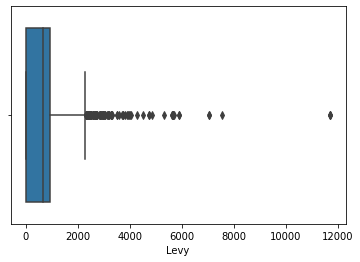

In [18]:
cols=['Levy','Engine volume', 'Mileage','Cylinders','Airbags']
sns.boxplot(df[cols[0]]);


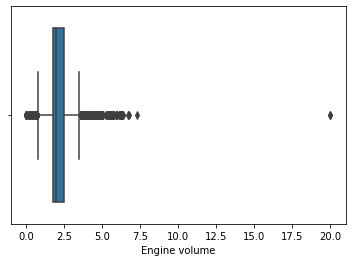

In [19]:
sns.boxplot(df[cols[1]]);


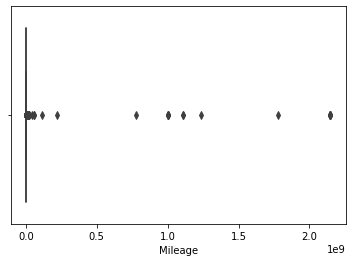

In [20]:
sns.boxplot(df[cols[2]]);

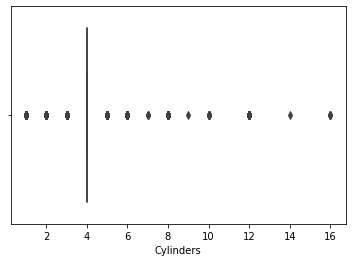

In [21]:
sns.boxplot(df[cols[3]]);


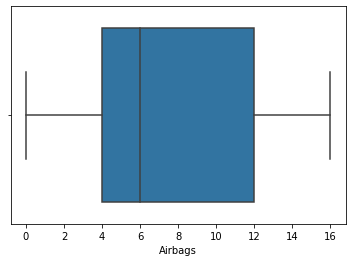

In [22]:
sns.boxplot(df[cols[4]]);

As we can see there are in 'Levy','Engine Volume','Mileage','Cylinders', columns.We will remove these outliers using InterQuantile Rangel (IQR) method.

In [26]:
def find_outliers_limit(df,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper

In [28]:
def remove_outlier(df,col,upper,lower):
    # identify outliers
    outliers = [x for x in df[col] if x upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return final
outlier_cols=['Levy','Engine volume','Mileage','Cylinders']
for col in outlier_cols:
    lower,upper=find_outliers_limit(df,col)
    df[col]=remove_outlier(df,col,upper,lower)

SyntaxError: invalid syntax (<ipython-input-28-bbd81268929e>, line 3)

In [33]:
def find_outliers_limit(df,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(df,col,upper,lower):
    # identify outliers
    outliers = [x for x in df[col] if x == upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return final
outlier_cols=['Levy','Engine volume','Mileage','Cylinders']
for col in outlier_cols:
    lower,upper=find_outliers_limit(df,col)
    df[col]=remove_outlier(df,col,upper,lower)

Levy
--------------------------------------------------
Percentiles: 25th=0.000, 75th=917.000, IQR=917.000
Lower: -1375.5  Upper: 2292.5
Identified outliers: 0
Non-outlier observations: 19076
Engine volume
--------------------------------------------------
Percentiles: 25th=1.800, 75th=2.500, IQR=0.700
Lower: 0.7500000000000002  Upper: 3.55
Identified outliers: 0
Non-outlier observations: 17856
Mileage
--------------------------------------------------
Percentiles: 25th=70139.000, 75th=188888.000, IQR=118749.000
Lower: -107984.5  Upper: 367011.5
Identified outliers: 0
Non-outlier observations: 18597
Cylinders
--------------------------------------------------
Percentiles: 25th=4.000, 75th=4.000, IQR=0.000
Lower: 4.0  Upper: 4.0
Identified outliers: 14367
Non-outlier observations: 14367


Lets examine the features after removing outliers.

 We can observe that there are no outliers in the features now. 


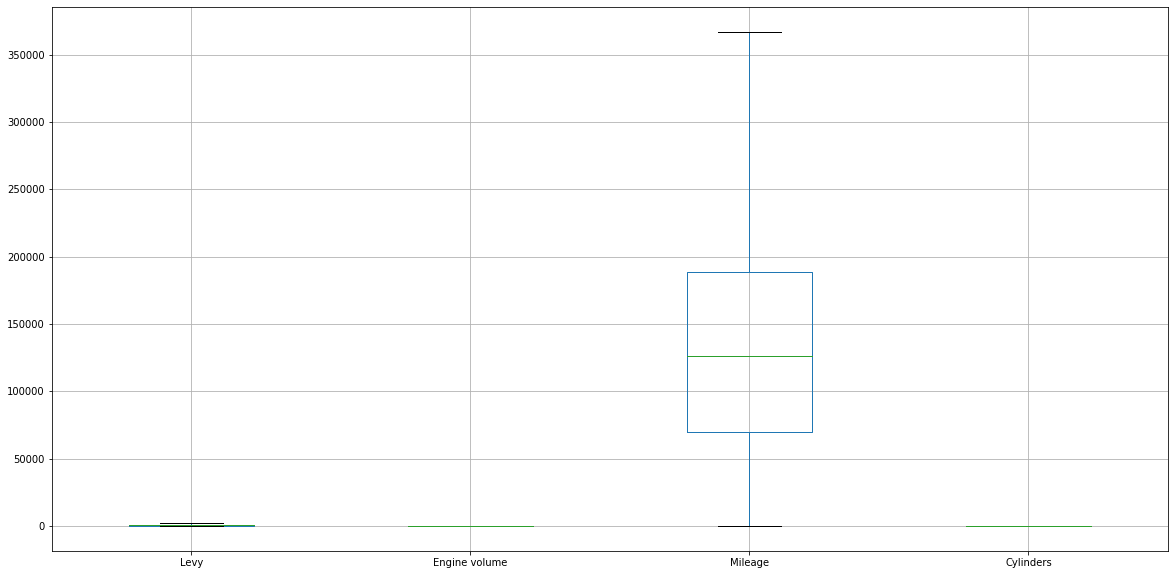

In [36]:
plt.figure(figsize=(20,10))
df[outlier_cols].boxplot()
print(' We can observe that there are no outliers in the features now. ')    

## Creating Additional Features

We see that 'Mileage'and 'Engine Volume' are continuous variables.
Creating the 'Binning' features for these features.

In [37]:
labels=[0,1,2,3,4,5,6,7,8,9]
df['Mileage_bin']=pd.cut(df['Mileage'],len(labels),labels=labels)
df['Mileage_bin']=df['Mileage_bin'].astype(float)
labels=[0,1,2,3,4]
df['EV_bin']=pd.cut(df['Engine volume'],len(labels),labels=labels)
df['EV_bin']=df['EV_bin'].astype(float)


In [38]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Mileage_bin,EV_bin
0,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,4.0,Automatic,4x4,4_5,Left wheel,Silver,12,0,5.0,4.0
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,4.0,Tiptronic,4x4,4_5,Left wheel,Black,8,0,5.0,4.0
2,8467.0,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4_5,Right-hand drive,Black,2,0,5.0,0.0
3,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4_5,Left wheel,White,0,0,4.0,3.0
4,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4_5,Left wheel,Silver,4,0,2.0,0.0


# Handling Categorical features

- I have used Ordinal Encoder ot handle the categorial columns.
- Ordinal Encoder works similar to LabelEncoder but Ordincal can be applied to multiple features while LableEncoder can be applied to one features at a time.

In [47]:
num_df=df.select_dtypes(include=np.number)

cat_df=df.select_dtypes(include=object)

encoding=OrdinalEncoder()

cat_cols=cat_df.columns.tolist()

encoding.fit(cat_df[cat_cols])

cat_oe=encoding.transform(cat_df[cat_cols])

cat_oe=pd.DataFrame(cat_oe,columns=cat_cols)

cat_df.reset_index(inplace=True,drop=True)

cat_oe.head()

num_df.reset_index(inplace=True,drop=True)

cat_oe.reset_index(inplace=True,drop=True)

final_all_df=pd.concat([num_df,cat_oe],axis=1)

In [48]:
final_all_df.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo,Mileage_bin,EV_bin,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,13328.0,1399.0,2010,3.5,186005.0,4.0,12,0,5.0,4.0,32.0,1242.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,12.0
1,16621.0,1018.0,2011,3.0,192000.0,4.0,8,0,5.0,4.0,8.0,658.0,4.0,0.0,5.0,2.0,0.0,1.0,0.0,1.0
2,8467.0,0.0,2006,1.3,200000.0,4.0,2,0,5.0,0.0,21.0,684.0,3.0,0.0,5.0,3.0,1.0,1.0,1.0,1.0
3,3607.0,862.0,2011,2.5,168966.0,4.0,0,0,4.0,3.0,16.0,661.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,14.0
4,11726.0,446.0,2014,1.3,91901.0,4.0,4,0,2.0,0.0,21.0,684.0,3.0,1.0,5.0,0.0,1.0,1.0,0.0,12.0


In [49]:
# cheacking correlation

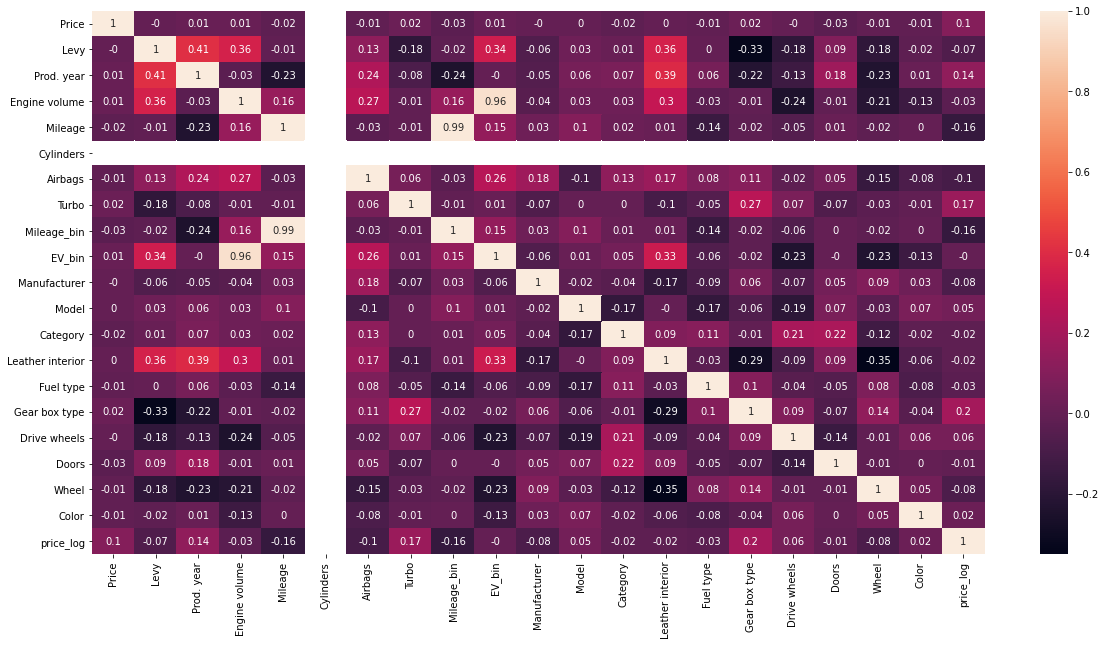

In [51]:
final_all_df['price_log']=np.log(final_all_df['Price'])
plt.figure(figsize=(20,10))

sns.heatmap(round(final_all_df.corr(),2),annot=True);

- We can observe that features are not much correlated the data.
- But one thing that we can notice after log transforming 'Price' column, correlation with few features got increased which is a good thing.-  We will be using log trasformed value of price for better performance to train the model.
- Feature transformaation helps to improve the model performacne.


## 5. Data Splitting and Scaling

- 80 percent for training and 20 percent for testing.
- we can see the feature not have same scale, for that we are using feature scalling method.

In [53]:
cols_drop=['Price','price_log','Cylinders']
X=final_all_df.drop(cols_drop,axis=1)
y=final_all_df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## 6. Model Performance

In [54]:
# Model Building

def train_ml_model(x,y,model_type):

    if model_type=='lr':

        model=LinearRegression()

    elif model_type=='xgb':

        model=XGBRegressor()

    elif model_type=='rf':

        model=RandomForestRegressor()

    model.fit(X_train_scaled,np.log(y))

    return model

def model_evaluate(model,x,y):

    predictions=model.predict(x)

    predictions=np.exp(predictions)

    mse=mean_squared_error(y,predictions)

    mae=mean_absolute_error(y,predictions)

    mape=mean_absolute_percentage_error(y,predictions)

    msle=mean_squared_log_error(y,predictions)

    mse=round(mse,2)

    mae=round(mae,2)

    mape=round(mape,2)

    msle=round(msle,2)

    return [mse,mae,mape,msle]

model_lr=train_ml_model(X_train_scaled,y_train,'lr')

model_xgb=train_ml_model(X_train_scaled,y_train,'xgb')

model_rf=train_ml_model(X_train_scaled,y_train,'rf')

## 6.1 Model Performance

We have evaluated the models using Mean_Squared_Error, Mean_Absolute_Error, Mean_Absolute_Percentage_Error, Mean_Squared_Log_Error as performance matrices, and below are the results we got.

In [56]:
summary=PrettyTable(['Model','MSE','MAE','MAPE','MSLE'])

summary.add_row(['LR']+model_evaluate(model_lr,X_test_scaled,y_test))

summary.add_row(['XGB']+model_evaluate(model_xgb,X_test_scaled,y_test))

summary.add_row(['RF']+model_evaluate(model_rf,X_test_scaled,y_test))

print(summary)


+-------+--------------+----------+------+------+
| Model |     MSE      |   MAE    | MAPE | MSLE |
+-------+--------------+----------+------+------+
|   LR  | 337217465.57 | 11117.14 | 6.88 | 2.04 |
|  XGB  | 195254474.28 | 6282.57  | 3.87 | 0.88 |
|   RF  | 105357075.67 | 4621.79  | 2.89 | 0.79 |
+-------+--------------+----------+------+------+


-  RandomForest performed really well among Machine Learning Model.

## 7. Result Visualization

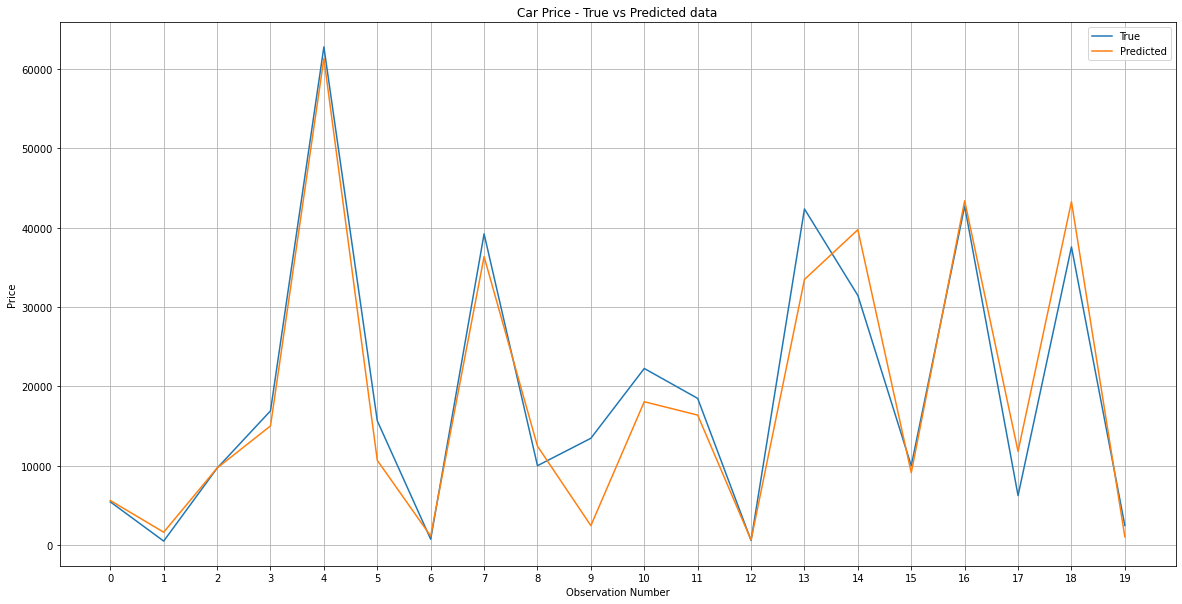

In [57]:
y_pred=np.exp(model_rf.predict(X_test_scaled))
number_of_observations=20
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()